In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.utils.get_file('horse-or-human.zip','https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip')

149585920/149574867 [==============================] - 2s 0us/step


'/root/.keras/datasets/horse-or-human.zip'

In [ ]:
import os #operating system make available os function
import zipfile # zip and unzip

local_zip = '/root/.keras/datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
import os
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse50-8.png', 'horse27-3.png', 'horse14-8.png', 'horse05-7.png', 'horse38-0.png', 'horse25-6.png', 'horse22-7.png', 'horse14-9.png', 'horse26-2.png', 'horse31-3.png']
['human08-02.png', 'human10-00.png', 'human04-06.png', 'human12-19.png', 'human05-25.png', 'human14-30.png', 'human08-20.png', 'human09-17.png', 'human16-08.png', 'human05-09.png']


In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

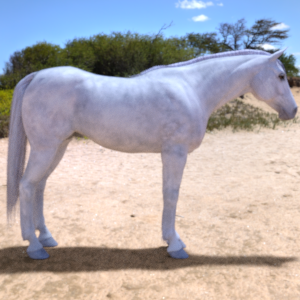

In [ ]:
image_1 = load_img('horse-or-human/horses/horse01-7.png')
image_1

In [ ]:
import matplotlib.image as mpimg
import numpy as np
imd = mpimg.imread('horse-or-human/horses/horse01-7.png')
imd.shape

(300, 300, 4)

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
folder_count = len(glob('horse-or-human/*'))
print(folder_count)

2


In [ ]:
IMG_HIEGHT = 300
IMG_WIDHT = 300

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=25,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                    validation_split=0.2,)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(directory='horse-or-human',
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training',
                                                    class_mode='binary')

Found 822 images belonging to 2 classes.


In [ ]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
val_data_gen = image_gen_val.flow_from_directory(directory='horse-or-human',
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation',
                                                class_mode='binary')

Found 205 images belonging to 2 classes.


In [ ]:
sample_data, label = next(train_data_gen)

In [ ]:
import time

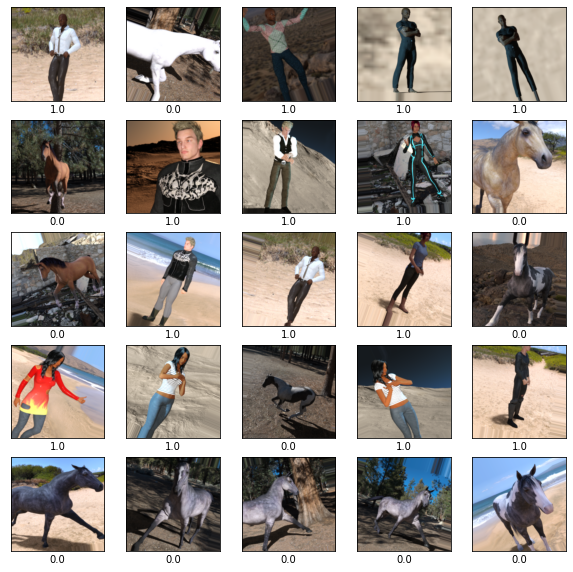

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

In [ ]:
from keras import layers
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (300, 300, 3),include_top = False, weights = 'imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

vgg_model = tf.keras.models.Model(base_model.input, x)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

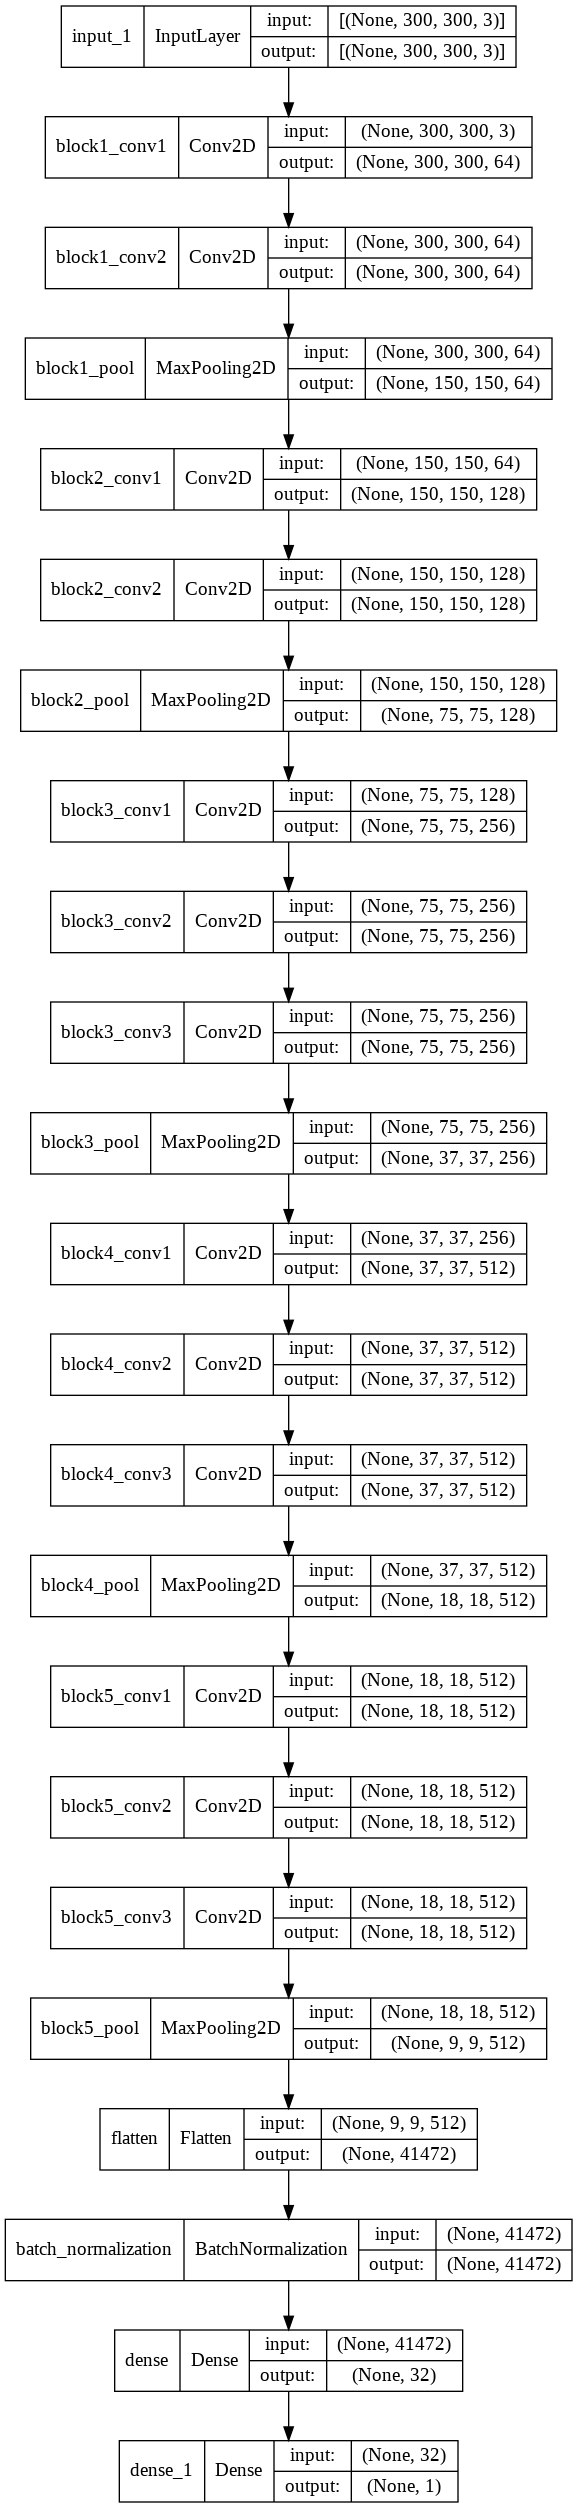

In [ ]:
tf.keras.utils.plot_model(vgg_model,show_shapes=True)

In [ ]:
vgg_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
t1 = time.time()
history = vgg_model.fit_generator(train_data_gen, epochs=10, validation_data=val_data_gen)
t2 = time.time()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
26/26 [==============================] - 71s 2s/step - loss: 0.1628 - accuracy: 0.9440 - val_loss: 0.3722 - val_accuracy: 0.8390
Epoch 2/10
26/26 [==============================] - 29s 1s/step - loss: 0.0337 - accuracy: 0.9915 - val_loss: 0.3817 - val_accuracy: 0.7756
Epoch 3/10
26/26 [==============================] - 28s 1s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.2863 - val_accuracy: 0.8537
Epoch 4/10
26/26 [==============================] - 28s 1s/step - loss: 0.0125 - accuracy: 0.9951 - val_loss: 0.3018 - val_accuracy: 0.8537
Epoch 5/10
26/26 [==============================] - 28s 1s/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.2201 - val_accuracy: 0.9317
Epoch 6/10
26/26 [==============================] - 27s 1s/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.1994 - val_accuracy: 0.9317
Epoch 7/10
26/26 [==============================] - 27s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2127 - val_accuracy: 0.9366
Epoch 8/10
26/26 [==

In [ ]:
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

Time to train model: 5.37 minuts


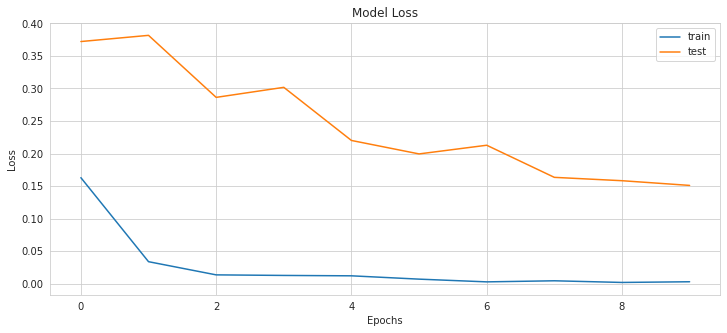

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

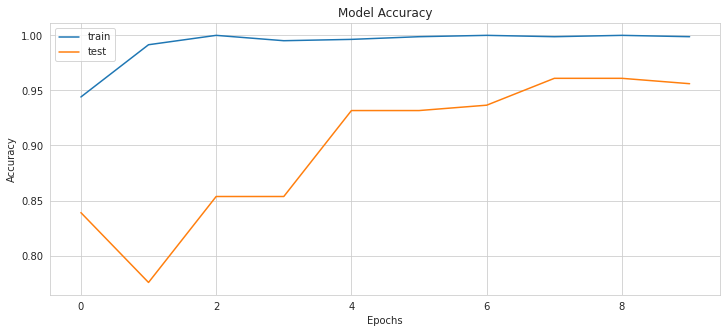

In [ ]:
# Plot model accuracy 
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Train data evaluation
train_score = vgg_model.evaluate_generator(train_data_gen)

# Validation data evaluation
valid_score = vgg_model.evaluate_generator(val_data_gen)
print("Train_Accuracy = ", train_score[1])
print("Validation_Accuracy = ", valid_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """


Train_Accuracy =  1.0
Validation_Accuracy =  0.9560975432395935


In [ ]:
# Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(300, 300 ,3), include_top=False, weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False 

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)
#x = layers.Dense(16, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

res_net_model = tf.keras.models.Model(base_model.input, x)


res_net_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
res_net_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
t1 = time.time()
history = res_net_model.fit_generator(train_data_gen, epochs=2, validation_data=val_data_gen)
t2 = time.time()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
26/26 [==============================] - 37s 1s/step - loss: 0.3036 - accuracy: 0.8796 - val_loss: 5.2017 - val_accuracy: 0.4878
Epoch 2/2
26/26 [==============================] - 26s 1s/step - loss: 0.1619 - accuracy: 0.9465 - val_loss: 2.7865 - val_accuracy: 0.4878


In [ ]:
# Inception


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

inception_model = tf.keras.models.Model(base_model.input, x)

In [ ]:
inception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 rmalization)                   )                                                           

In [ ]:
inception_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
t1 = time.time()
history = inception_model.fit_generator(train_data_gen, epochs=2, validation_data=val_data_gen)
t2 = time.time()
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
26/26 [==============================] - 40s 1s/step - loss: 0.0704 - accuracy: 0.9659 - val_loss: 0.0667 - val_accuracy: 0.9756
Epoch 2/2
26/26 [==============================] - 26s 1s/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.1260 - val_accuracy: 0.9512
Time to train model: 1.14 minuts


In [ ]:
#Efficientnet

In [ ]:
!pip install -U efficientnet

     |████████████████████████████████| 50 kB 3.2 MB/s 


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

base_model = EfficientNetB0(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

efficientnet = tf.keras.models.Model(base_model.input, x)

In [ ]:
efficientnet.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 300, 300, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 300, 300, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 301, 301, 3)  0           ['normalization[0][0]']    

In [ ]:
efficientnet.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
t1 = time.time()
history = efficientnet.fit_generator(train_data_gen, epochs=2, validation_data=val_data_gen)
t2 = time.time()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
26/26 [==============================] - 36s 1s/step - loss: 2.9004 - accuracy: 0.5280 - val_loss: 0.7322 - val_accuracy: 0.5122
Epoch 2/2
26/26 [==============================] - 24s 917ms/step - loss: 2.3913 - accuracy: 0.4939 - val_loss: 1.4678 - val_accuracy: 0.4878
